# single picture analysis

In [1]:
from utilities import *
import seaborn as sns

18-Jul-25 14:25:20 - bfio.backends - WARNING  - Java backend is not available. This could be due to a missing dependency (jpype).


### downloading files from zenodo

https://zenodo.org/records/16037033

only the images necessary for image and picture analysis

In [ ]:
path_name = get_zenodo('example')

## suffixes to deal with multiple pictures with the same format

In [3]:
pic_name = 'example'

# using suffix methods in case that we have multiple pictures stored in different folders, but saved with the same name format
mito_suffix = '_MITO.tif'


mitobin_suffix = '_MITOBIN.h5'

cell_suffix = '_CELLS.tif'
soma_suffix = '_SOMAS.tif'
vent_suffix = '_VENTRICLE.tif'

In [4]:
# information about the ventricular thickness is obtained manually from other pictures of the same tissue
pic_info = {'vent_thick': 55}


results_pic, results_mito_pic, results_ap, results_bp = picture_analysis(path_name, pic_name, mito_suffix, mitobin_suffix, cell_suffix, soma_suffix, vent_suffix, pic_info)

print(results_pic)


# results_pic.to_csv('examples/example_picture_analysis/' + pic_name + '_results.csv')
# results_mito_pic.to_csv('examples/example_picture_analysis/' + pic_name + '_results_mito.csv')
# results_ap.to_csv('examples/example_picture_analysis/' + pic_name + '_results_apical_process.csv')
# results_bp.to_csv('examples/example_picture_analysis/' + pic_name + '_results_basal_process.csv')

c:\Users\USUARIO\miniconda3\envs\MitoLandscape-env\Lib\site-packages\aicsimageio\readers\tiff_reader.py:148: UserWarning: Could not parse tiff pixel size: 'unit'
  warnings.warn(f"Could not parse tiff pixel size: {e}")


 - [ 85 171] - ventricular distance DONE
--- 85 - distance
 - DONE
--- 171 - distance
 - DONE
   compartment     volume  mito_volume     length  num_mito  num_p  num_r  \
0          1.0   8.544308     0.066967   0.000000       5.0    0.0    5.0   
1          2.0  14.100553     0.061601   0.000000       4.0    0.0    4.0   
2          3.0   3.958583     0.012122  11.801895       7.0    4.0    3.0   
3          4.0   1.772132     0.000000   9.436386       0.0    0.0    0.0   
0          1.0  11.221583     0.063589   0.000000       2.0    1.0    1.0   
1          2.0   8.763490     0.205272   0.000000       1.0    0.0    0.0   
2          3.0  10.693799     0.365634  17.484170      12.0    1.0   10.0   
3          4.0   8.169335     0.543483  26.579083      19.0    2.0   17.0   

   num_n  mito_length pict_code  cell_label    cell_code  vent_thick  \
0    0.0     1.838263   example          85   example_85          55   
1    0.0     1.832609   example          85   example_85          55

In [5]:
cell_colors = ['#ec7853', '#ad2692']

In [6]:
compartment_dict = {
    1: 'apical soma',
    2: 'basal soma',
    3: 'apical process',
    4: 'basal process'
}
ordered_numbers = [3,1,2,4]


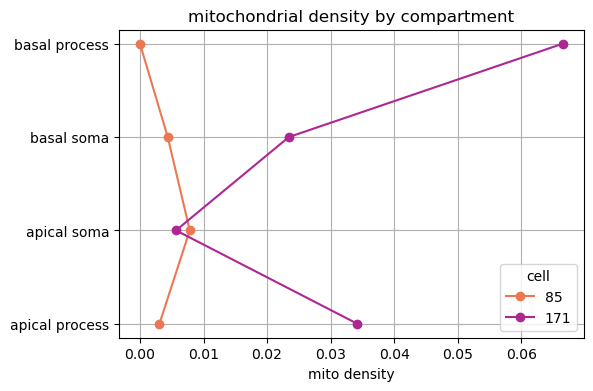

In [7]:
df = results_pic.copy()

df['compartment'] = df['compartment'].map(compartment_dict)

ordered_labels = [compartment_dict[n] for n in ordered_numbers]

df['compartment'] = pd.Categorical(df['compartment'], categories=ordered_labels, ordered=True)

sources = df['cell_label'].unique()

plt.figure(figsize=(6, 4))

for i, source in enumerate(sources):
    df_source = df[df['cell_label'] == source].sort_values('compartment')
    
    x = df_source['compartment']
    y = df_source['mito_volume']/df_source['volume']
    
    plt.plot(y, x, marker='o', label=source, color = cell_colors[i])

plt.xlabel('mito density')
plt.title(f'mitochondrial density by compartment')
plt.legend(title='cell')
plt.grid(True)

plt.show()


In [8]:
# print(results_mito_pic)

grouped_mito_df = results_mito_pic.groupby(['cell_label', 'compartment'])[['n_branches', 'n_junctions', 'length']].mean().reset_index()

print(grouped_mito_df)

   cell_label  compartment  n_branches  n_junctions    length
0          85          1.0    1.000000     0.000000  0.367653
1          85          2.0    1.000000     0.000000  0.458152
2          85          3.0    0.428571     0.000000  0.038460
3         171          1.0    0.500000     0.000000  1.372486
4         171          2.0    4.000000     2.000000  5.124645
5         171          3.0    1.083333     0.083333  0.819414
6         171          4.0    0.894737     0.000000  0.972212


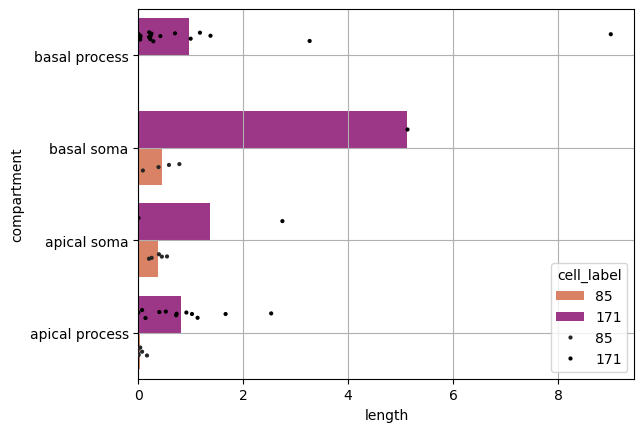

In [9]:
mito_df = results_mito_pic.copy()

mito_df['compartment'] = mito_df['compartment'].map(compartment_dict)

ordered_labels = [compartment_dict[n] for n in ordered_numbers]

mito_df['compartment'] = pd.Categorical(mito_df['compartment'], categories=ordered_labels, ordered=True)

mito_df = mito_df.sort_values('compartment')


sns.barplot(
    data = mito_df,
    x = 'length',
    y = 'compartment',
    hue = 'cell_label',
    dodge = True,
    palette = cell_colors,
    errorbar = None
)

sns.stripplot(
    data = mito_df,
    x = 'length',
    y = 'compartment',
    hue = 'cell_label',
    dodge=True,
    palette='dark:black',
    jitter=True,
    size=3,
)

plt.gca().invert_yaxis()
plt.grid()

In [10]:
import matplotlib as mpl
print("Cache directory:", mpl.get_cachedir())

Cache directory: C:\Users\USUARIO\.matplotlib
